In [1]:
import csv
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATASET_PATH = "/content/drive/MyDrive/test/data-intellismell"

###Something

In [4]:
# Store header, raw data, and number of lines found in each .csv file
header = None
raw_data = []
num_lines = []
filenames = []

# Read each CSV file
for filename in os.listdir(DATASET_PATH):

  # Check if the path is a file
  filepath = os.path.join(DATASET_PATH, filename)
  if not os.path.isfile(filepath):
    continue

  # Read the .csv file
  with open(filepath) as f:
    csv_reader = csv.reader(f, delimiter=',')

    # Read each line
    valid_line_counter = 0
    for line_count, line in enumerate(csv_reader):

      # Check header
      if line_count == 0:

        # Record first header as our official header for all the data
        if header == None:
          header = line

        # Check to make sure subsequent headers match the original header
        if header == line:
          num_lines.append(0)
          filenames.append(filename)
        else:
          print("Error: Headers do not match. Skipping", filename)
          break

      # Construct raw data array, make sure number of elements match number
      # of header labels
      else:
        if len(line) == len(header):
          raw_data.append(line)
          num_lines[-1] += 1
        else:
          print("Error: Data length does not match header length. Skipping line.")
          continue

# Convert our raw data into a numpy array
raw_data = np.array(raw_data).astype(float)

# Print out our results
print("Dataset array shape:", raw_data.shape)
print("Number of elements in num_lines:", len(num_lines))
print("Number of filenames:", len(filenames))
assert(len(num_lines) == len(filenames))

Error: Headers do not match. Skipping tuna-in-brine.1725370826008.csv
Error: Headers do not match. Skipping tuna-in-brine.1725373306772.csv
Error: Headers do not match. Skipping tuna-in-brine.1725375808188.csv
Error: Headers do not match. Skipping tuna-in-brine.1725376156301.csv
Error: Headers do not match. Skipping vodka.1725370445266.csv
Error: Headers do not match. Skipping vodka.1725372925579.csv
Error: Headers do not match. Skipping vodka.1725375402281.csv
Error: Headers do not match. Skipping vodka.1725377759773.csv
Error: Headers do not match. Skipping yellow-mustard.1725369696307.csv
Error: Headers do not match. Skipping yellow-mustard.1725372548541.csv
Error: Headers do not match. Skipping yellow-mustard.1725374607126.csv
Error: Headers do not match. Skipping yellow-mustard.1725375021195.csv
Error: Headers do not match. Skipping yellow-mustard.1725377357758.csv
Error: Headers do not match. Skipping background.1725368984606.csv
Error: Headers do not match. Skipping background.1

###something

In [5]:
# Convert to DataFrame for easier plotting
df = pd.DataFrame(raw_data, columns=header)

In [6]:
df.head()

,timestamp,voc,no2,eth,co,temp,hum
0,8192135.0,1.26,1.23,0.7,1.33,24.6,49.0
1,8192672.0,1.26,1.23,0.7,1.33,24.6,49.0
2,8193185.0,1.26,1.23,0.7,1.33,24.6,49.0
3,8193697.0,1.26,1.23,0.7,1.33,24.6,49.0
4,8194211.0,1.26,1.23,0.7,1.34,24.6,49.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40024 entries, 0 to 40023
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  40024 non-null  float64
 1   voc        40024 non-null  float64
 2   no2        40024 non-null  float64
 3   eth        40024 non-null  float64
 4   co         40024 non-null  float64
 5   temp       40024 non-null  float64
 6   hum        40024 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


In [8]:
df.shape

(40024, 7)

###something

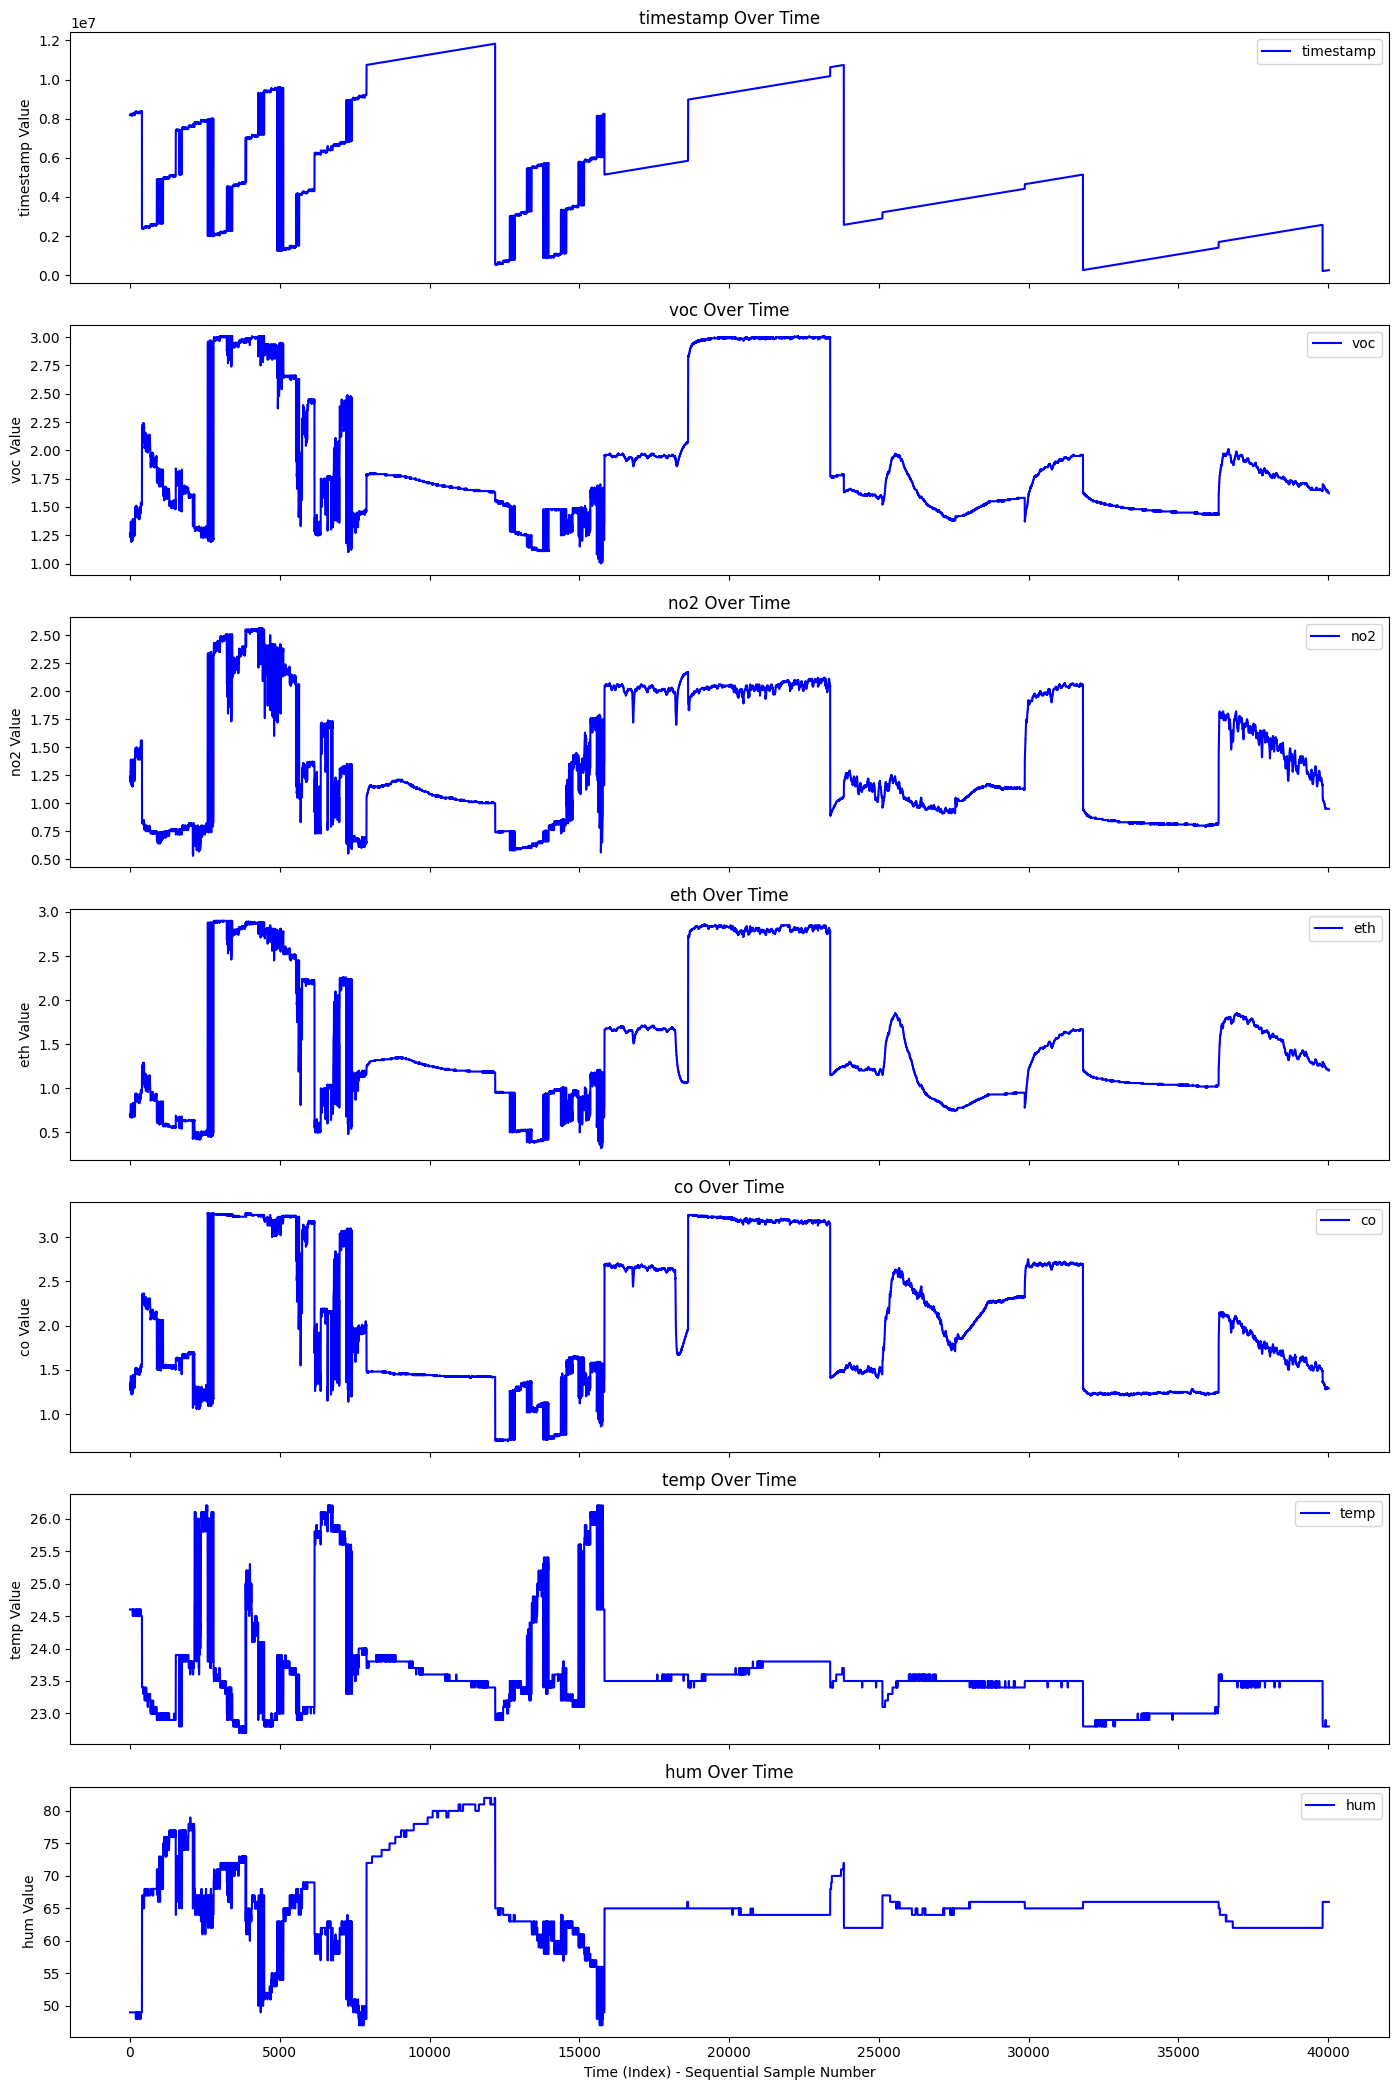

In [9]:
n_features = raw_data.shape[1]
fig, axes = plt.subplots(n_features, 1, figsize=(14, 3 * n_features), sharex=True)

time = np.arange(raw_data.shape[0])

for i in range(n_features):
    axes[i].plot(time, raw_data[:, i], label=header[i], color='blue')
    axes[i].set_title(f'{header[i]} Over Time')

    # Add explanatory y-axis label
    axes[i].set_ylabel(f'{header[i]} Value')

    axes[i].legend(loc='upper right')

# Add explanatory x-axis label for the shared x-axis
axes[-1].set_xlabel('Time (Index) - Sequential Sample Number')

plt.tight_layout()
plt.show()

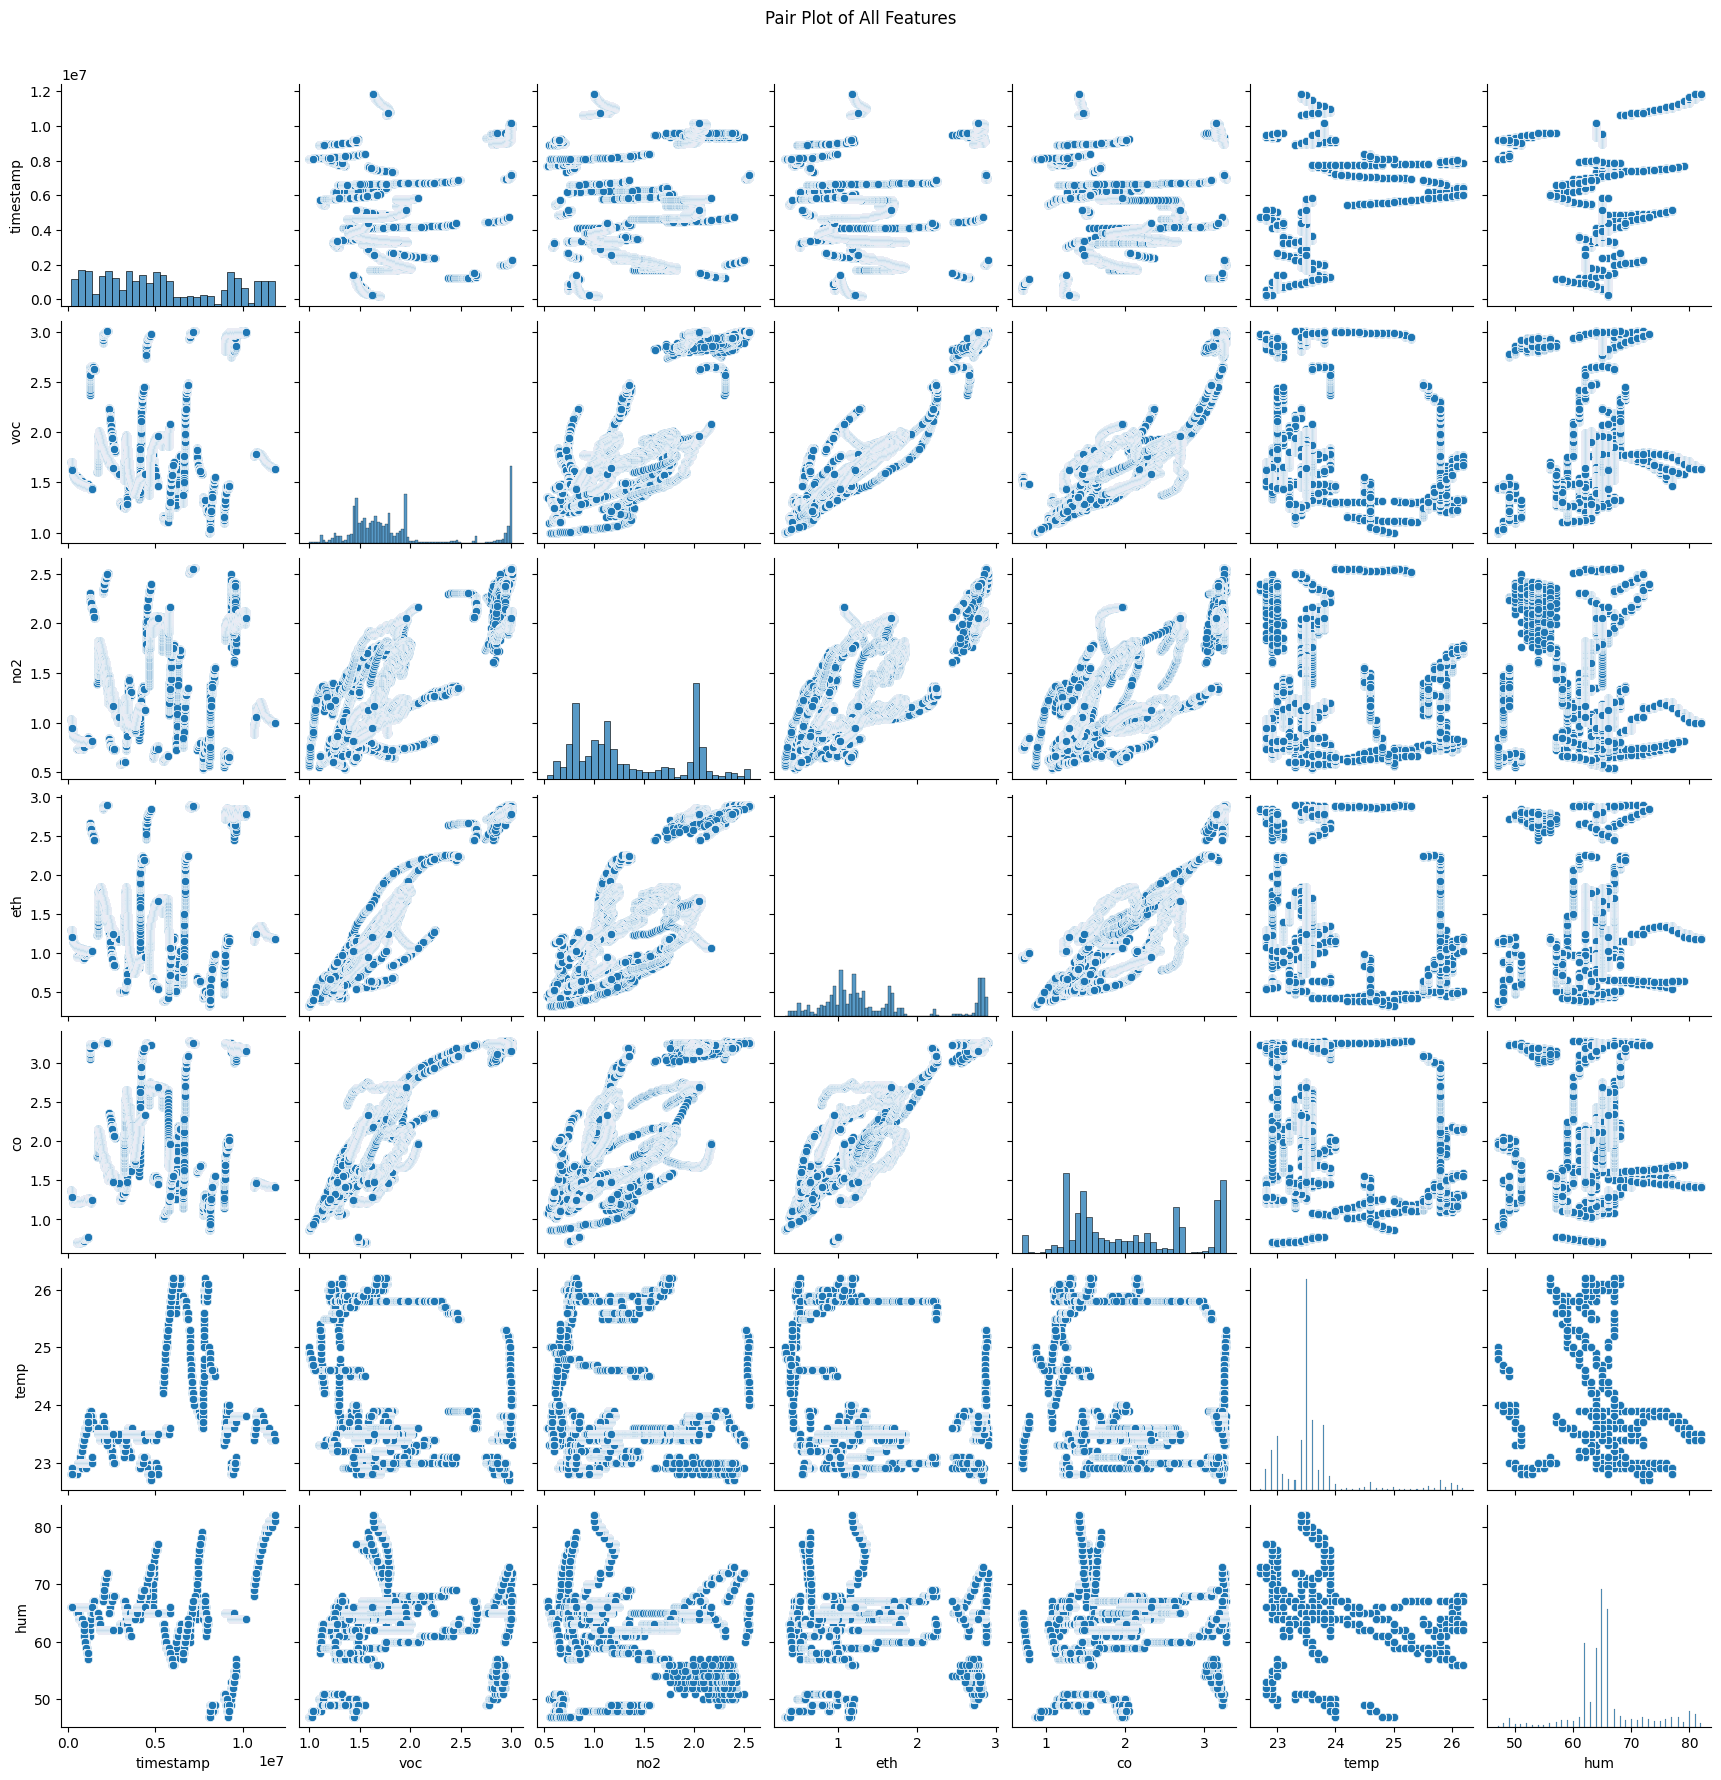

In [10]:
# Create a pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot of All Features', y=1.02)
plt.show()

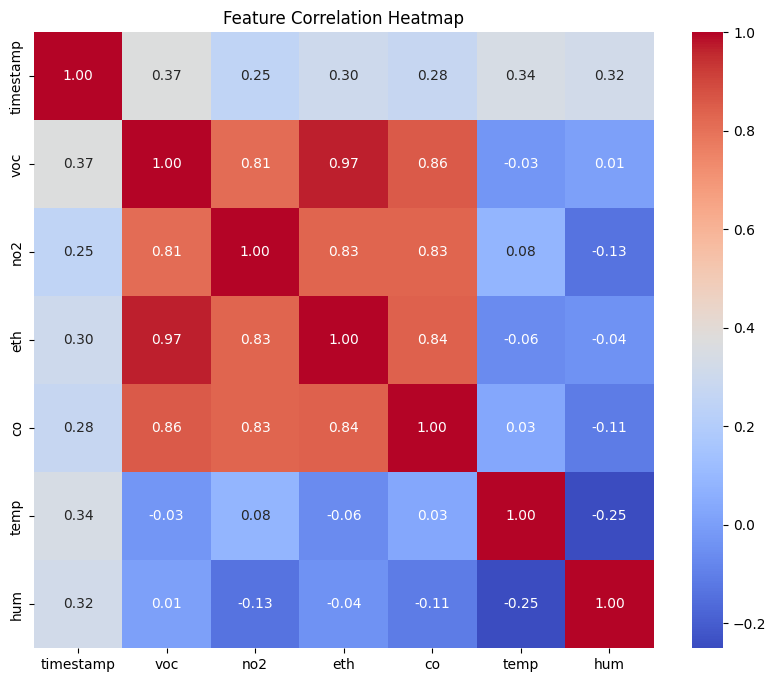

In [11]:
# Compute the correlation matrix
corr_matrix = np.corrcoef(raw_data.T)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", xticklabels=header, yticklabels=header, cmap="coolwarm", cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

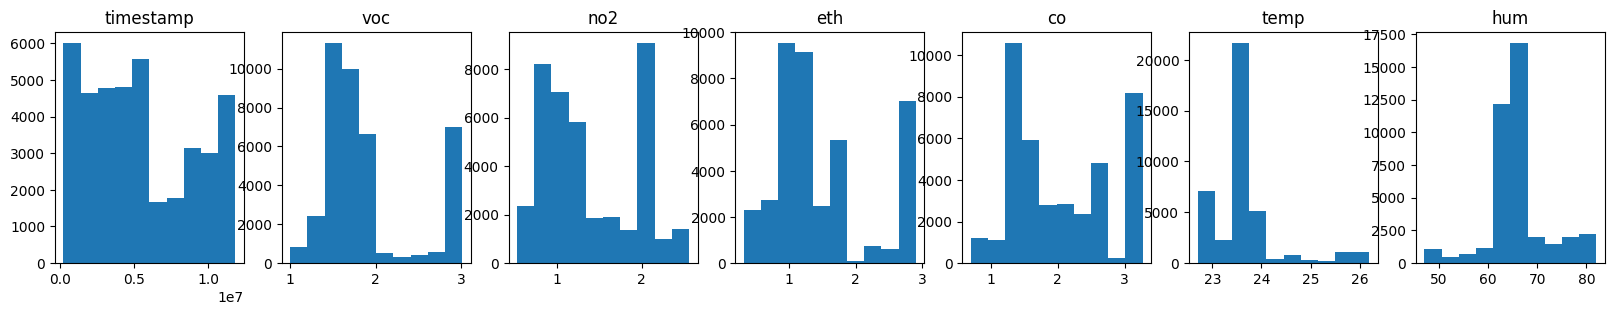

In [12]:
# Create subplots
num_hists = len(header)
fig, axs = plt.subplots(1, num_hists, figsize=(20,3))

# Create histogram for each category of data
for i in range(num_hists):
  _ = axs[i].hist(raw_data[:, i])
  axs[i].title.set_text(header[i])

###something

In [13]:
# Calculate means, standard deviations, and ranges
means = np.mean(raw_data, axis=0)
std_devs = np.std(raw_data, axis=0)
maxes = np.max(raw_data, axis=0)
mins = np.min(raw_data, axis=0)
ranges = np.ptp(raw_data, axis=0)

# Print results
for i, name in enumerate(header):
  print(name)
  print("  mean:", means[i])
  print("  std dev:", std_devs[i])
  print("  max:", maxes[i])
  print("  min:", mins[i])
  print("  range:", ranges[i])

timestamp
  mean: 5382339.991829902
  std dev: 3488378.6199592003
  max: 11830292.0
  min: 210400.0
  range: 11619892.0
voc
  mean: 1.8996064861081747
  std dev: 0.5552674620227896
  max: 3.01
  min: 1.0
  range: 2.01
no2
  mean: 1.3757952728362248
  std dev: 0.543611487270237
  max: 2.56
  min: 0.53
  range: 2.0300000000000002
eth
  mean: 1.4892269638216273
  std dev: 0.7218776888213273
  max: 2.9
  min: 0.32
  range: 2.58
co
  mean: 2.0445202878272086
  std dev: 0.7609946891983144
  max: 3.27
  min: 0.7
  range: 2.5700000000000003
temp
  mean: 23.610263841697655
  std dev: 0.6629388339861169
  max: 26.2
  min: 22.7
  range: 3.5
hum
  mean: 65.63122126723965
  std dev: 6.052003354332356
  max: 82.0
  min: 47.0
  range: 35.0


###something

In [14]:
PREP_DROP = -1                      # Drop a column
PREP_NONE = 0                       # Perform no preprocessing on column of data
PREP_STD = 1                        # Perform standardization on column of data
PREP_NORM = 2                       # Perform normalization on column of data

# Change this to match your picks!
preproc = [PREP_NONE,   # Timestamp
           PREP_NORM,   # voc
           PREP_NORM,   # no2
           PREP_NORM,   # eth
           PREP_NORM,   # co
           PREP_NORM,   # temp
           PREP_NORM]   # hum

# Check to make sure we have the correct number of preprocessing request elements
assert(len(preproc) == len(header))
assert(len(preproc) == raw_data.shape[1])

In [15]:
# Figure out how many columns we plan to keep
num_cols = sum(1 for x in preproc if x != PREP_DROP)

# Create empty numpy array and header for preprocessed data
prep_data = np.zeros((raw_data.shape[0], num_cols))
prep_header = []
prep_means = []
prep_std_devs = []
prep_mins = []
prep_ranges = []

# Go through each column to preprocess the data
prep_c = 0
for raw_c in range(len(header)):

  # Drop column if requested
  if preproc[raw_c] == PREP_DROP:
    print("Dropping", header[raw_c])
    continue

  # Perform data standardization
  if preproc[raw_c] == PREP_STD:
    prep_data[:, prep_c] = (raw_data[:, raw_c] - means[raw_c]) / std_devs[raw_c]

  # Perform data normalization
  elif preproc[raw_c] == PREP_NORM:
    prep_data[:, prep_c] = (raw_data[:, raw_c] - mins[raw_c]) / ranges[raw_c]

  # Copy data over if no preprocessing is requested
  elif preproc[raw_c] == PREP_NONE:
    prep_data[:, raw_c] = raw_data[:, raw_c]

  # Error if code not recognized
  else:
    raise Exception("Preprocessing code not recognized")

  # Copy header (and preprocessing constants) and increment preprocessing column index
  prep_header.append(header[raw_c])
  prep_means.append(means[raw_c])
  prep_std_devs.append(std_devs[raw_c])
  prep_mins.append(mins[raw_c])
  prep_ranges.append(ranges[raw_c])
  prep_c += 1

# Show new data header and shape
print(prep_header)
print("New data shape:", prep_data.shape)
print("Means:", [float("{:.4f}".format(x)) for x in prep_means])
print("Std devs:", [float("{:.4f}".format(x)) for x in prep_std_devs])
print("Mins:", [float("{:.4f}".format(x)) for x in prep_mins])
print("Ranges:", [float("{:.4f}".format(x)) for x in prep_ranges])

['timestamp', 'voc', 'no2', 'eth', 'co', 'temp', 'hum']
New data shape: (40024, 7)
Means: [5382339.9918, 1.8996, 1.3758, 1.4892, 2.0445, 23.6103, 65.6312]
Std devs: [3488378.62, 0.5553, 0.5436, 0.7219, 0.761, 0.6629, 6.052]
Mins: [210400.0, 1.0, 0.53, 0.32, 0.7, 22.7, 47.0]
Ranges: [11619892.0, 2.01, 2.03, 2.58, 2.57, 3.5, 35.0]


###something

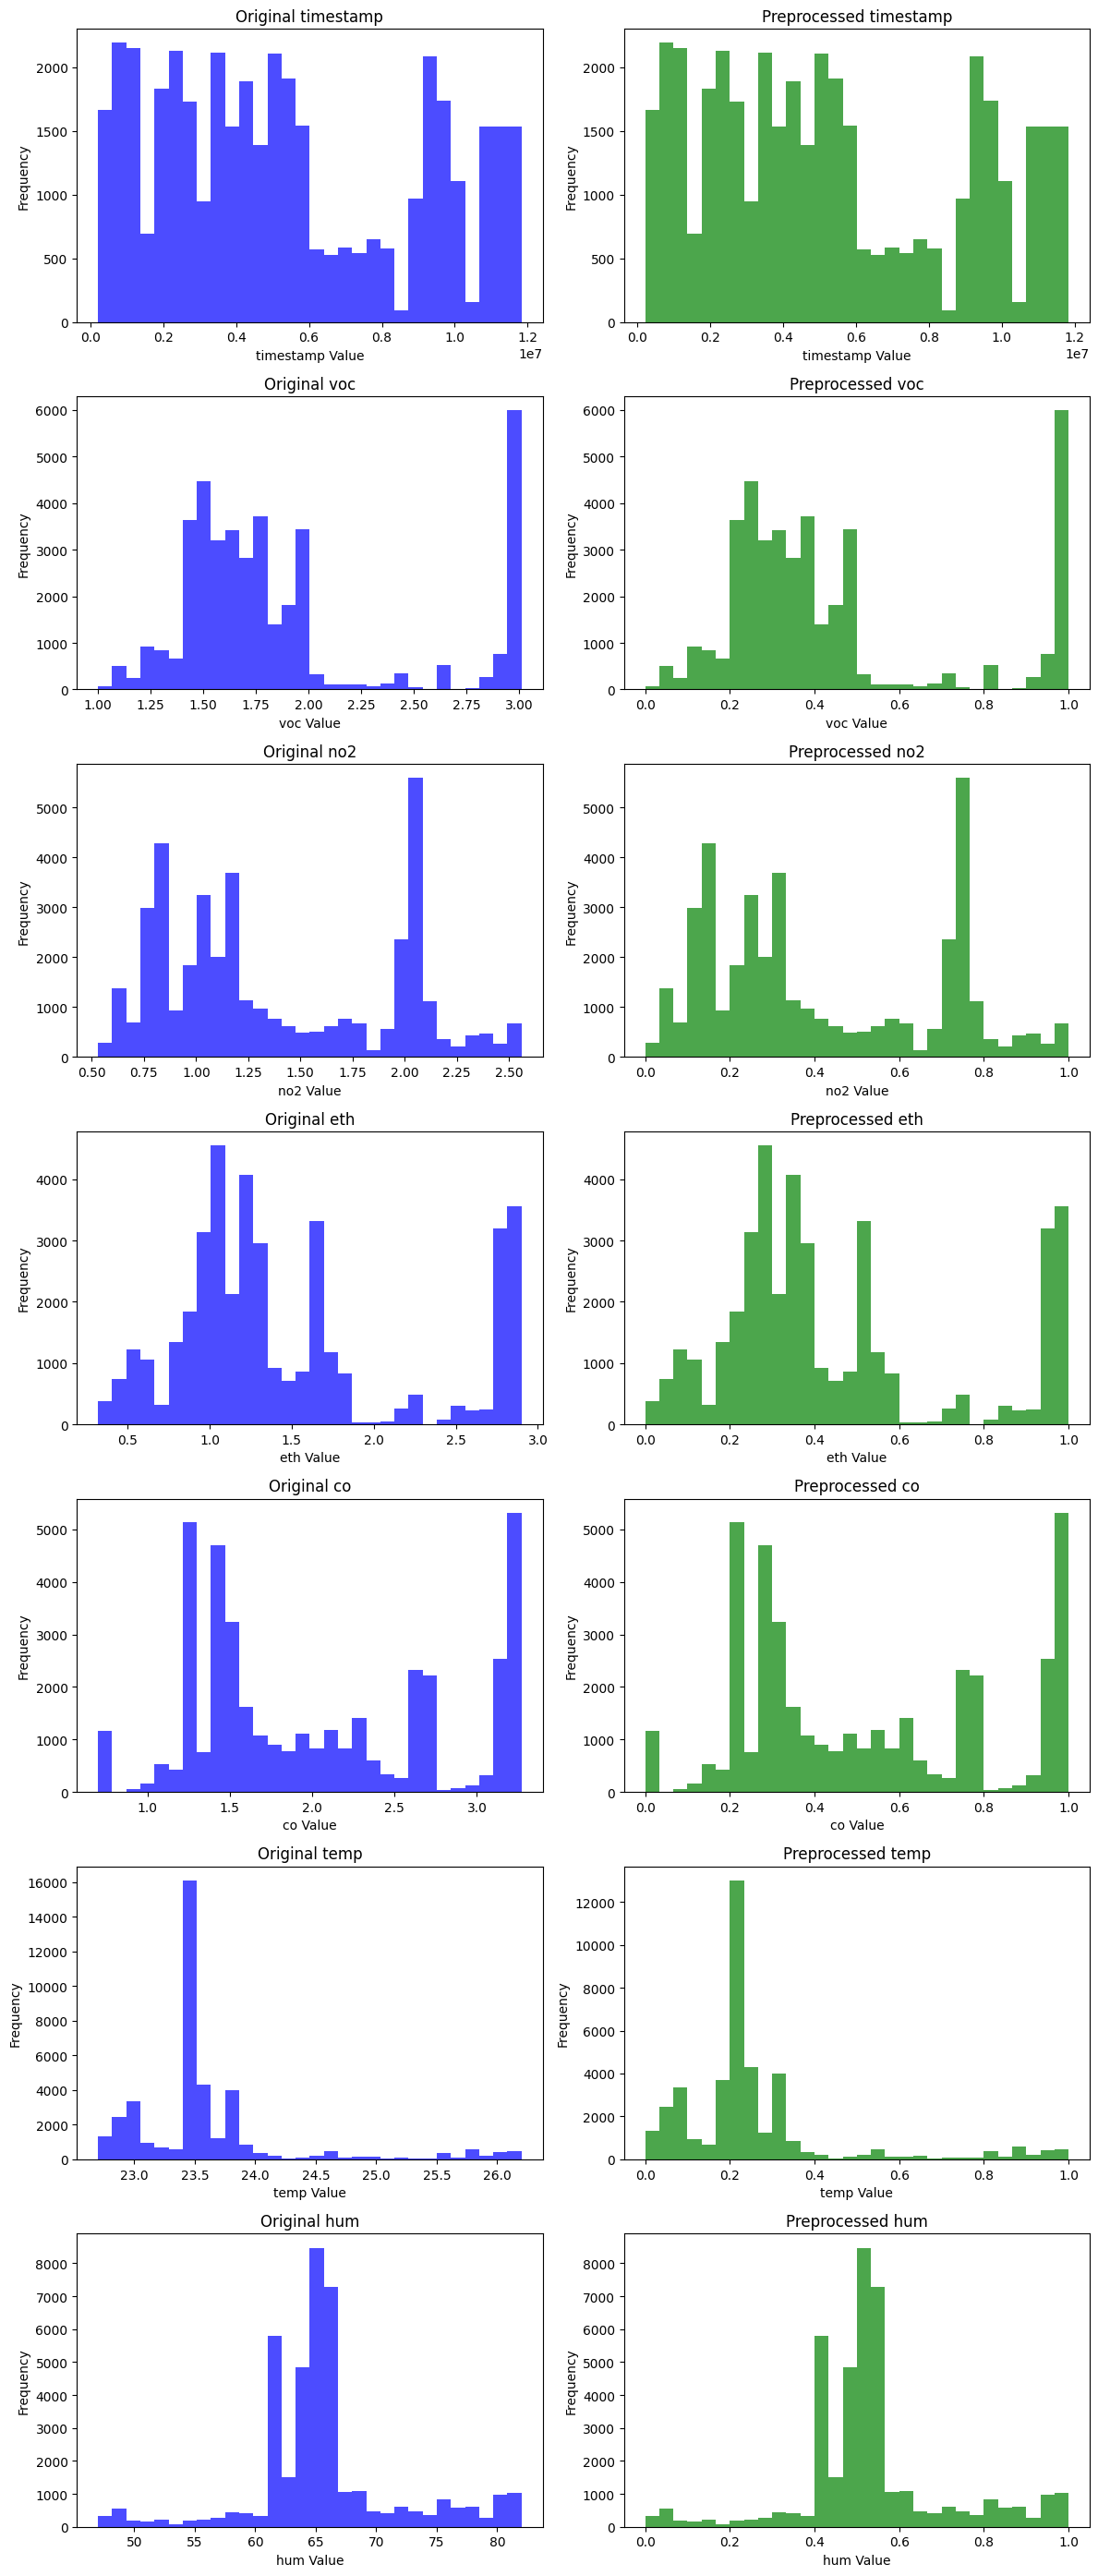

In [16]:
# Number of features after preprocessing
n_features = len(prep_header)

# Plot original vs. preprocessed data
fig, axes = plt.subplots(n_features, 2, figsize=(12, 4 * n_features))

for i in range(n_features):
    # Original data histogram
    axes[i, 0].hist(raw_data[:, header.index(prep_header[i])], bins=30, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original {prep_header[i]}')
    axes[i, 0].set_xlabel(f'{prep_header[i]} Value')
    axes[i, 0].set_ylabel('Frequency')

    # Preprocessed data histogram
    axes[i, 1].hist(prep_data[:, i], bins=30, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Preprocessed {prep_header[i]}')
    axes[i, 1].set_xlabel(f'{prep_header[i]} Value')
    axes[i, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

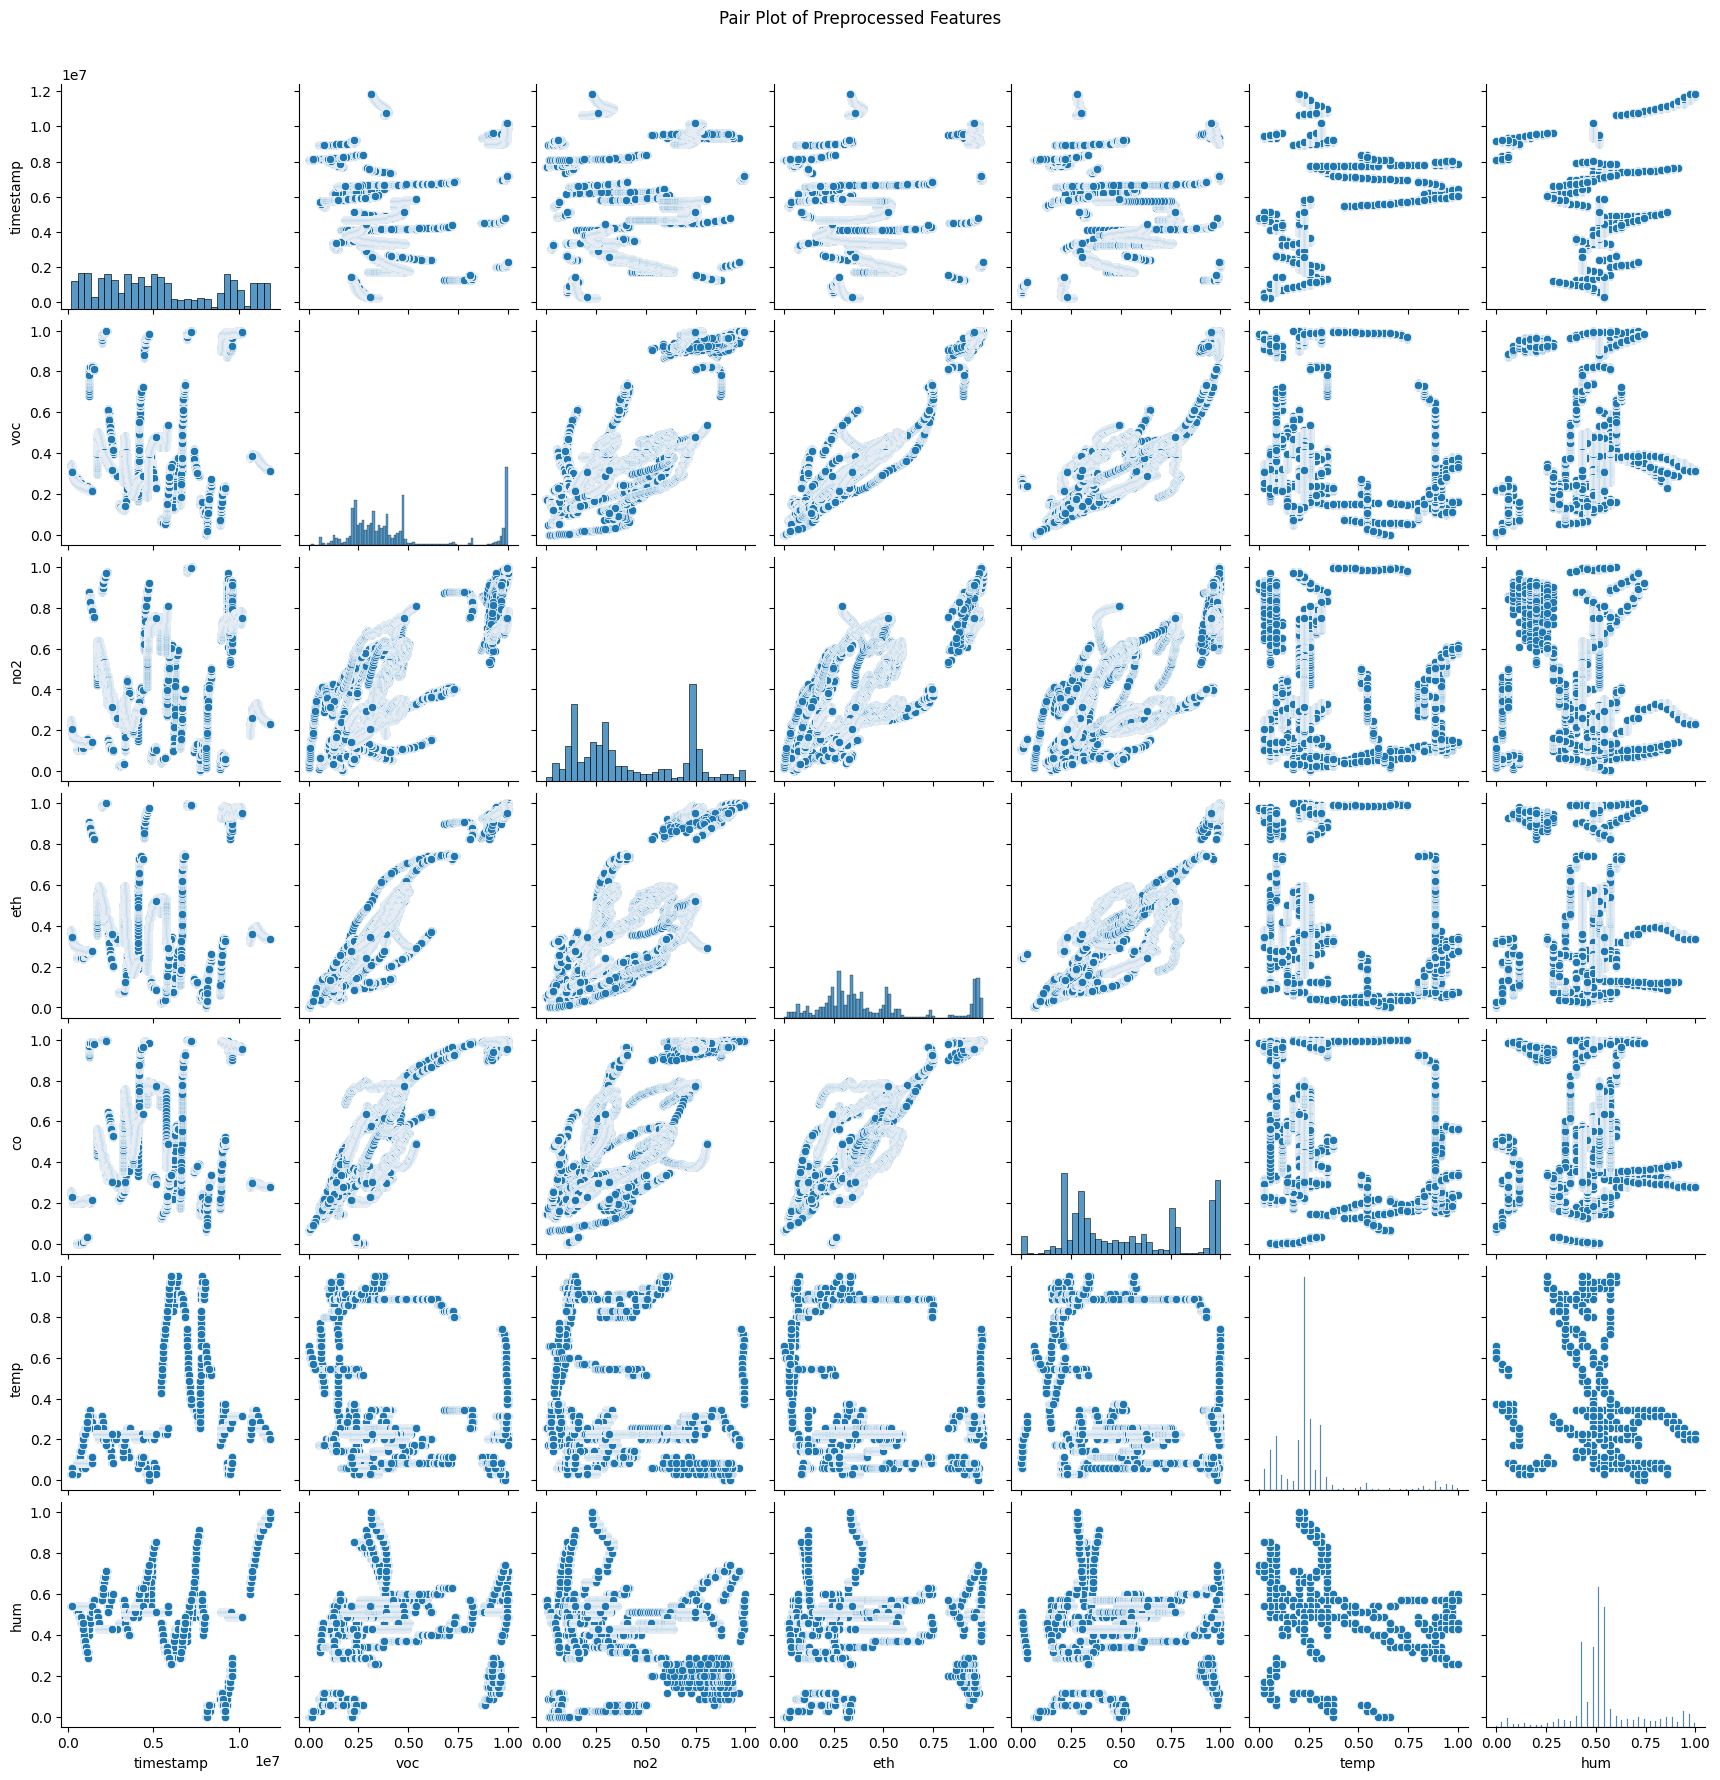

In [17]:
prep_df = pd.DataFrame(prep_data, columns=prep_header)

# Create a pair plot
sns.pairplot(prep_df)
plt.suptitle('Pair Plot of Preprocessed Features', y=1.02)
plt.show()

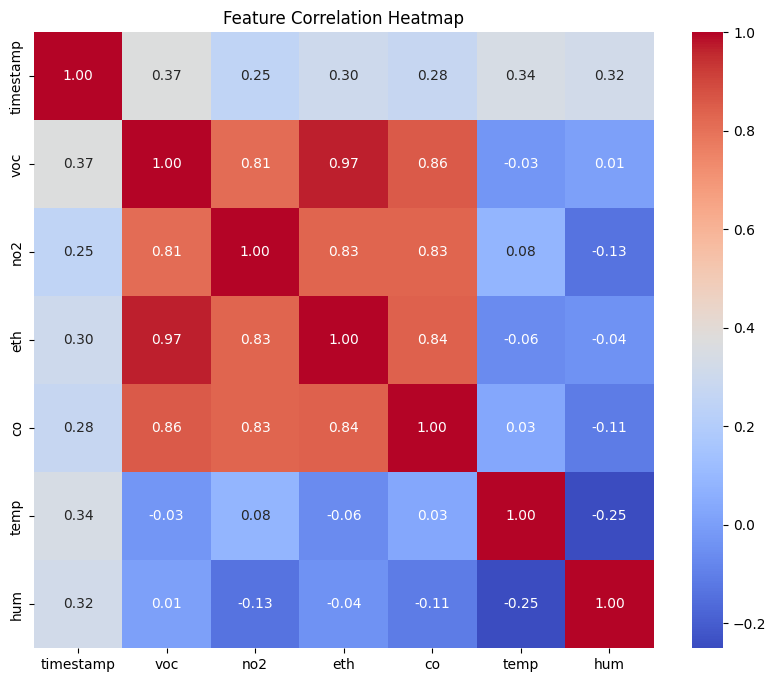

In [18]:
corr_matrix = prep_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [19]:
OUT_PATH = "/content/out-test"           # Where output files go (will be deleted and recreated)
OUT_ZIP = "/content/out-test.zip"        # Where to store the zipped output files

### Delete output directory (if it exists) and recreate it
if os.path.exists(OUT_PATH):
  shutil.rmtree(OUT_PATH)
os.makedirs(OUT_PATH)

In [20]:
### Write out data to .csv files

# Go through all the original filenames
row_index = 0
for file_num, filename in enumerate(filenames):

  # Open .csv file
  file_path = os.path.join(OUT_PATH, filename)
  with open(file_path, 'w') as f:
    csv_writer = csv.writer(f, delimiter=',')

    # Write header
    csv_writer.writerow(prep_header)

    # Write contents
    for _ in range(num_lines[file_num]):
      csv_writer.writerow(prep_data[row_index])
      row_index += 1

In [21]:
HOME_PATH = "/content"              # Location of the working directory

### Zip output directory
%cd {OUT_PATH}
!zip -FS -r -q {OUT_ZIP} *
%cd {HOME_PATH}

/content/out-test
/content


###Below just for visuals without timestamp

In [22]:
# Filter out "timestamp" from the header and corresponding data
timestamp_index = header.index("timestamp")
filtered_header = [name for i, name in enumerate(header) if i != timestamp_index]
filtered_data = np.delete(raw_data, timestamp_index, axis=1)

# Recalculate statistics without "timestamp"
means = np.mean(filtered_data, axis=0)
std_devs = np.std(filtered_data, axis=0)
maxes = np.max(filtered_data, axis=0)
mins = np.min(filtered_data, axis=0)
ranges = np.ptp(filtered_data, axis=0)

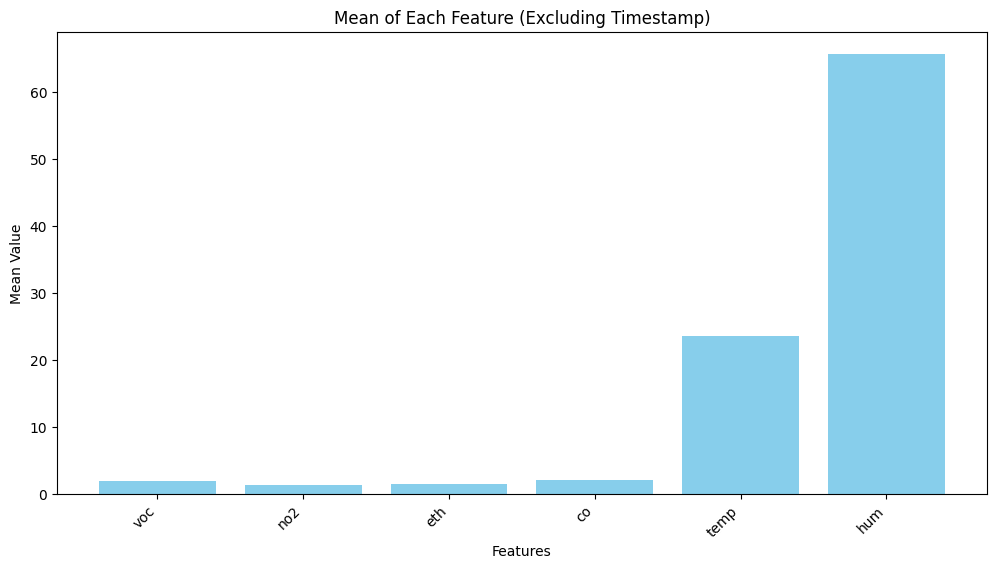

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_header, means, color='skyblue')
plt.title('Mean of Each Feature (Excluding Timestamp)')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.show()


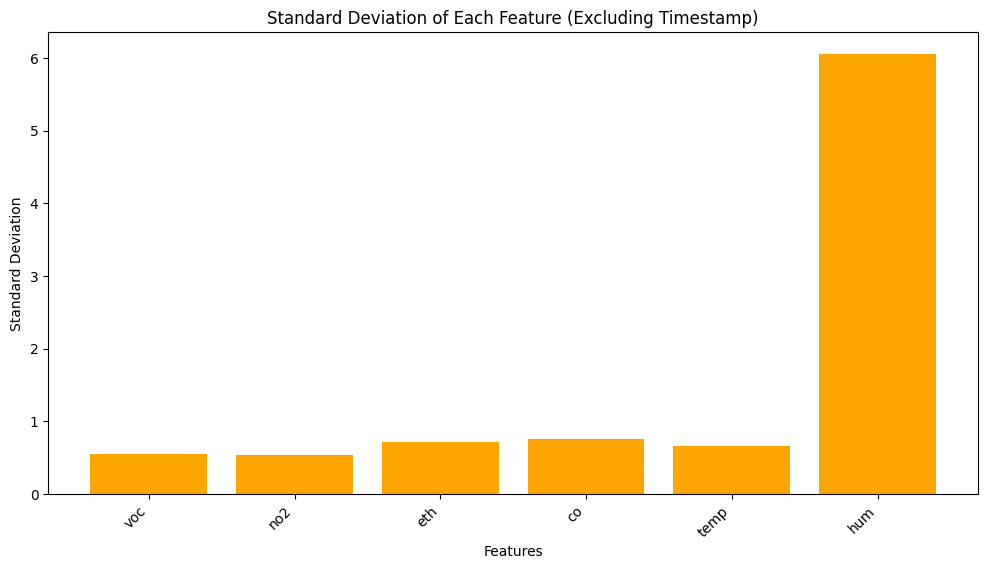

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_header, std_devs, color='orange')
plt.title('Standard Deviation of Each Feature (Excluding Timestamp)')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.show()


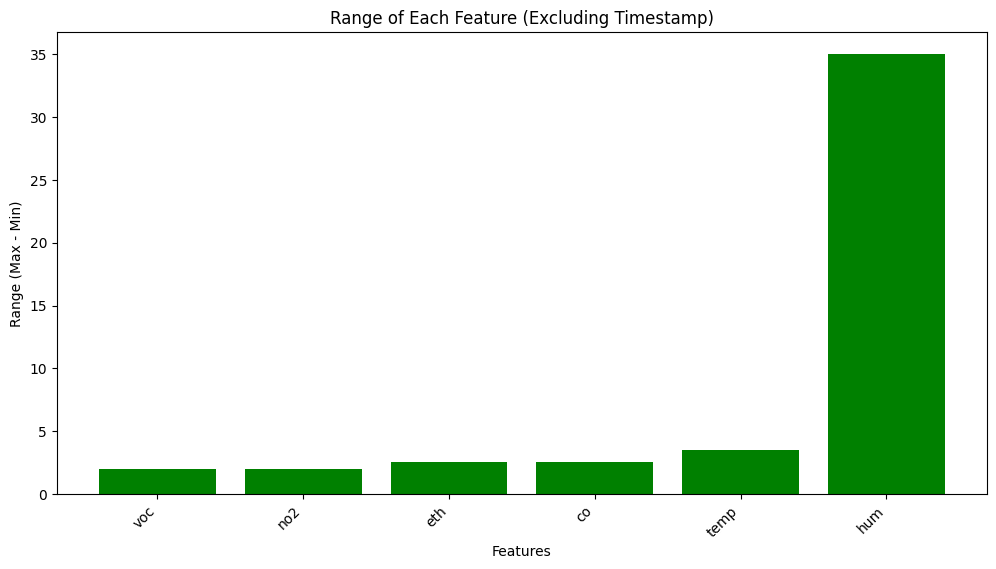

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_header, ranges, color='green')
plt.title('Range of Each Feature (Excluding Timestamp)')
plt.xlabel('Features')
plt.ylabel('Range (Max - Min)')
plt.xticks(rotation=45, ha='right')
plt.show()


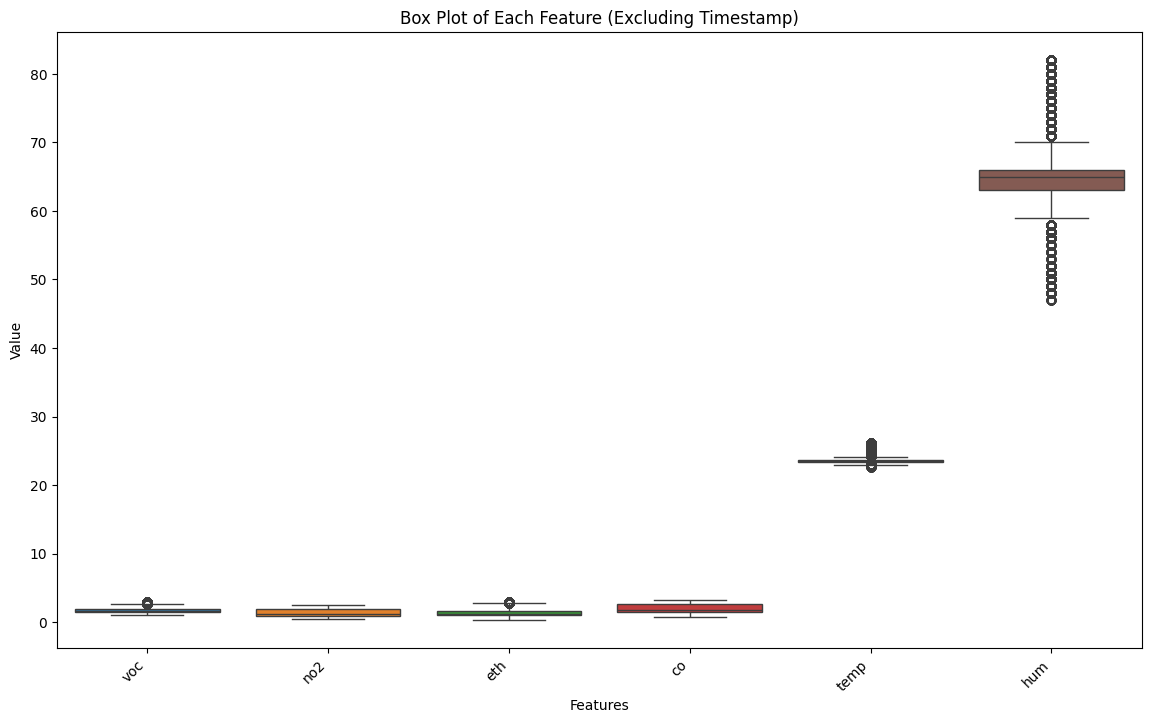

In [26]:
df_filtered = pd.DataFrame(filtered_data, columns=filtered_header)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered)
plt.title('Box Plot of Each Feature (Excluding Timestamp)')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.show()


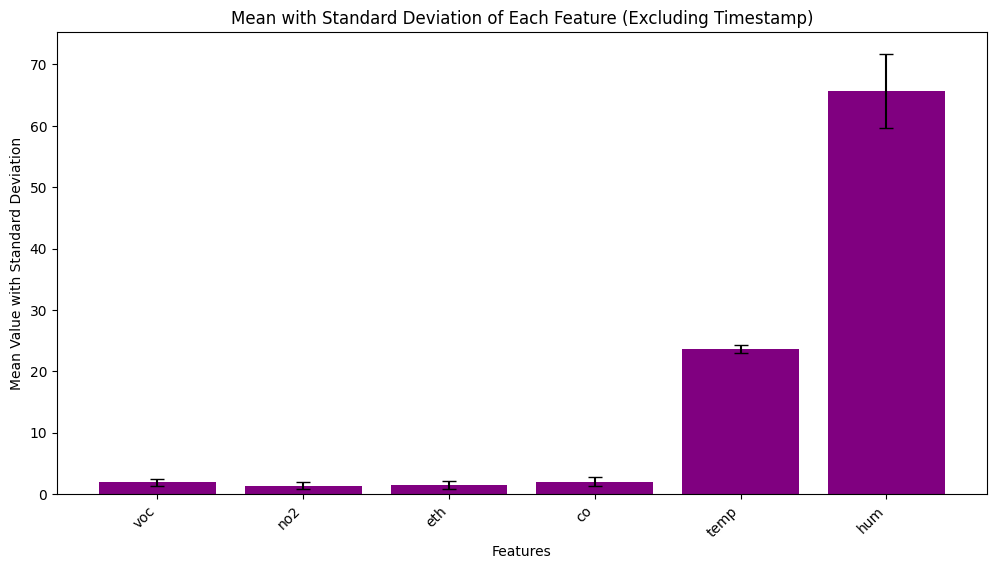

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_header, means, yerr=std_devs, capsize=5, color='purple')
plt.title('Mean with Standard Deviation of Each Feature (Excluding Timestamp)')
plt.xlabel('Features')
plt.ylabel('Mean Value with Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.show()


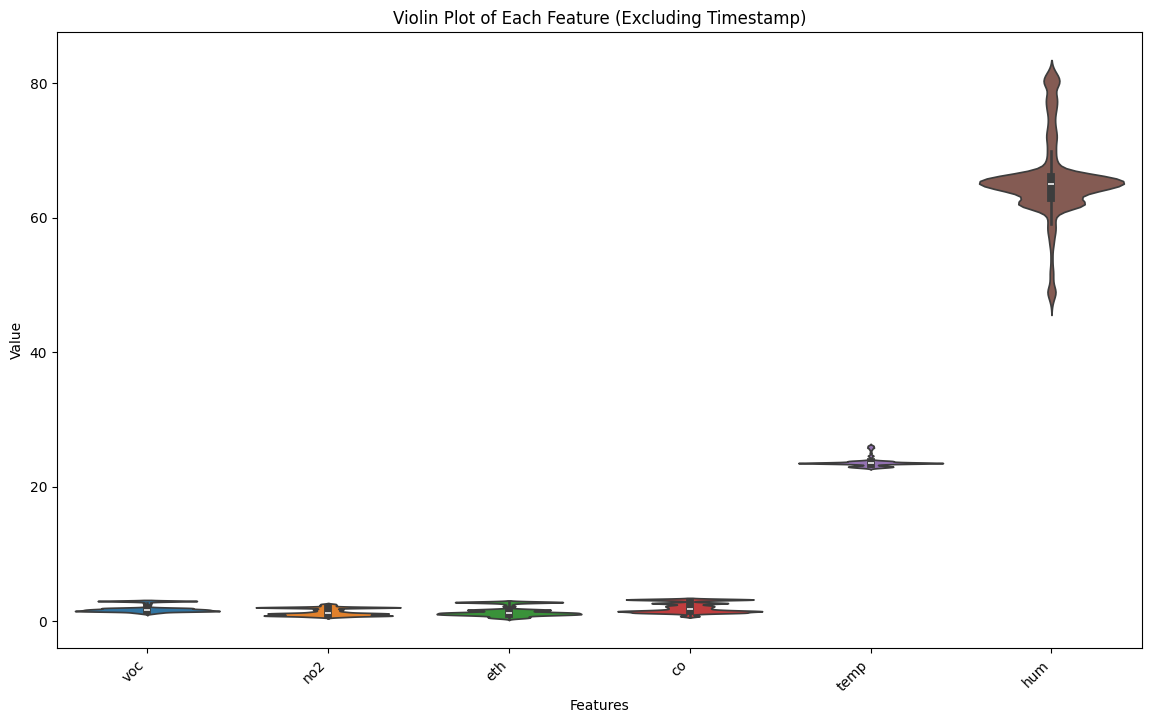

In [28]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_filtered)
plt.title('Violin Plot of Each Feature (Excluding Timestamp)')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.show()
